# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Цель исследования - установить параметры для определения рыночной стоимости объектов недвижимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение общей информации

Для начала импортируем библиотеки pandas и matplotlib и сохраним данные в переменную `data`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
try:
    data = pd.read_csv('/Users/macbook/practicum/projects/real_estate_project/real_estate_data.csv', sep='	')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='	')

Теперь мы можем вывести первые строки датафрейма на экран, чтобы получить первое представление об имеющихся данных.

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Выведем основную информацию о датафрейме.

In [4]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Итак, в датафрейме 23 698 строк и 22 столбца. Это достаточно репрезентативная выборка, чтобы на ее основе можно было выделить основные параметры, влияющие на рыночную стоимость объектов недвижимости.

Согласно документации к данным по столбцам:
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — общая площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

Для большей нагляности визуализируем количественные данные.

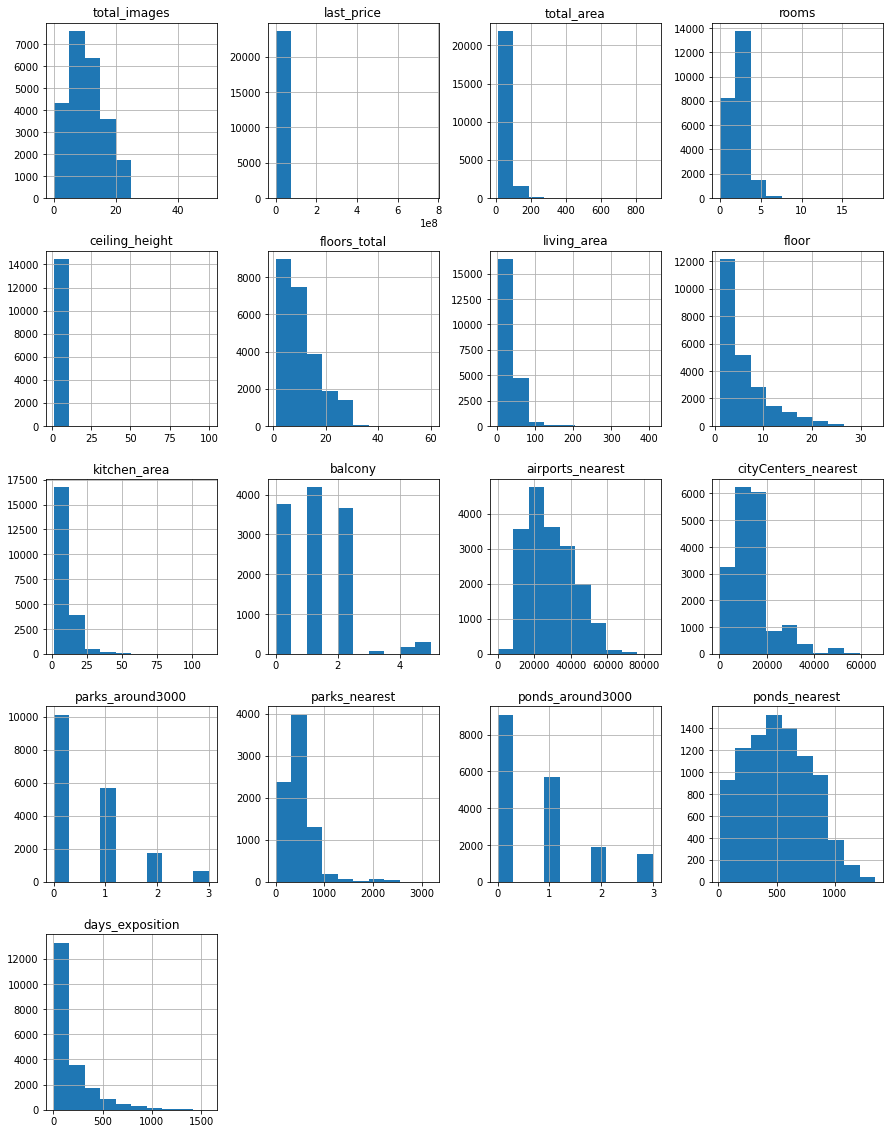

In [5]:
data.hist(figsize=(15, 20));

На гистограммах выше мы видим распределение количественных данных в датафрейме.

Проанализировав эти графики, мы можем получить первичное представление о данных и возможных аномалиях. На первый взгляд, аномалий нет, но для того, чтобы сделать выводы, проведем более глубокий анализ данных.


## Предобработка данных

### Работа с пропусками

#### Изучение данных на предмет пропусков

Для начала определим, в каких столбцах есть пропуски и сколько их.

In [6]:
data.isna().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

##### Апартаменты
Как правило, апартаменты представляют собой небольшую долю от общего предложения объектов недвижимости. Соответственно, учитывая количество пропусков, заменим их на значение `False`.

In [7]:
data['is_apartment'] = data['is_apartment'].fillna(False)

##### Расстояние до ближайшего парка и водоема
Пропуски в значениях расстояния до ближайшего парка и водоема не будем заменять на какие-либо средние значения, так как для них нет очевидной замены.

##### Число балконов
Можно предположить, что если число балконов не указано, то, скорее всего, в его квартире их нет. Поэтому заполним пропуски значением `0`.

In [8]:
data['balcony'] = data['balcony'].fillna(0)

##### Высота потолков
Пропуски в высоте потолков заполним медианным значением.

In [9]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

##### Расстояние до ближайшего аэропорта и до центра города
Расстояние до ближайшего аэропорта и до центра города не будем заменять на какие-либо усредненные значения, так как для них нет очевидной замены.

##### Число парков и водоемов в радиусе 3 км
Аналогично можно предположить, что если количество парков и водоёмов в пределах 3 км не указано, то вероятнее всего, их нет. Поэтому заполним пропуски значением `0`.

In [10]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

##### Продолжительность размещения объявления
Пропуски в продолжительности размещения объявления (от публикации до снятия) могут указывать на то, что объявление еще не было снято на момент выгрузки данных, поэтому не будем заменять их на какие-либо усредненные значения.

##### Жилая площадь и площадь кухни
Пропущенные значения в данных о жилой площади и площади кухни мы заменим, используя средний коэффициент отношения жилой площади к общей площади и площади кухни к общей площади, соответственно.

In [11]:
data['living_area'] = data['living_area'].fillna(data['total_area']*data['living_area'].mean()/data['total_area'].mean())
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area']*data['kitchen_area'].mean()/data['total_area'].mean())

##### Количество этажей в доме и названия населенных пунктов
Пропусков в данных столбцах очень мало, поэтому мы просто исключим строки с пропущенными значениями в них.

In [12]:
data = data.query('floors_total.notna() and locality_name.notna()')

#### Результат
Проверим количество пропусков после применения изменений.

In [13]:
data.isna().sum().sort_values(ascending=False)

parks_nearest           15535
ponds_nearest           14529
airports_nearest         5524
cityCenters_nearest      5501
days_exposition          3171
last_price                  0
ponds_around3000            0
parks_around3000            0
locality_name               0
balcony                     0
kitchen_area                0
total_images                0
studio                      0
is_apartment                0
floor                       0
living_area                 0
floors_total                0
ceiling_height              0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

#### Причины пропусков в данных

Среди видов данных, в которых присутствуют пропуски, есть как вписанные пользователем (апартаменты, количество балконов, высота потолков), так и полученные автоматически на основе картографических данных (расстояние до ближайших аэропорта, парка, водоёма, и центра города, количество парков и водоёмов в пределах 3 км).

Пропуски в первом типе данных объясняются человеческим фактором - возможно пользователь не посчитал нужным заполнять данные поля.

Пропуски же во втором типе данных могут указывать на несовершенство алгоритмов, используемых для вычисления этих данных.

### Изменение типов данных

В следующих столбцах необходимо изменить тип данных:
* в `first_day_exposition` необходимо изменить тип данных на `datetime`, так как в нем содержатся дата и время публикации
* в `is_apartment` необходимо изменить тип данных на `bool`, так как в нем содержатся признак, является ли объект недвижимости апартаментами
* в `balcony`, `parks_around3000`, `ponds_around3000` необходимо изменить тип данных на `int`, так как данные в них могут содержать только целые значения (например, не может быть 1.5 балкона - либо 1, либо 2)

In [14]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')
data['is_apartment'] = data['is_apartment'].astype(bool)
data['balcony'] = data['balcony'].astype(int)
data['parks_around3000'] = data['parks_around3000'].astype(int)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)

Проверим тип данных после применения изменений.

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

### Обработка дубликатов

#### Явные дубликаты

Проверим наличие явных дубликатов.

In [16]:
data.duplicated().sum()

0

Так как явных дубликатов в датафрейме не оказалось, перейдем к неявным дубликатам.

#### Неявные дубликаты

В датафрейме есть всего один столбец с текстовыми данными - `locality_name`. Изучим уникальные значения в нем.

In [17]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

В названиях населенных пунктов возникли дубликаты из-за использования буквы "ё" в некоторых словах (например, "поселок" - "посёлок"), а также из-за различных вариаций написания одного и того же типа населенных пунктов (например, "поселок городского типа", "городской поселок" и т.д.).

Устраним дубликаты.

In [18]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['городской поселок', 'поселок городского типа', 'поселок станции', 'поселок при железнодорожной станции', 'коттеджный поселок'], 'поселок', regex=True)
)

### Вывод

В результате предобработки данных мы заменили пропуски, где это было возможно, заменили типы данных на более подходящие, а также заменили названия некоторых населенных пунктов, чтобы избавиться от дубликатов.

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

## Добавление новых столбцов

Добавим в датафрейм новые столбцы с дополнительной информацией:
* `price_per_m2` - цена одного квадратного метра
* `day_of_week_of_exposition` - день недели публикации объявления
* `month_of_exposition` - месяц публикации объявления
* `year_of_exposition` - год публикации объявления
* `floor_type` - тип этажа квартиры
* `cityCenters_nearest_km` - расстояние до центра города в километрах

In [20]:
data['price_per_m2'] = round(data['last_price']/data['total_area'],2)
data['day_of_week_of_exposition'] = data['first_day_exposition'].dt.weekday
data['month_of_exposition'] = data['first_day_exposition'].dt.month
data['year_of_exposition'] = data['first_day_exposition'].dt.year

#для опеределения типа этажа необходимо написать функцию, которая будет присваивать этот тип
def floor_categorisation(floor, floors_total):
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
#применим эту функцию к датафрейму
data['floor_type'] = data.apply(lambda row: floor_categorisation(row['floor'], row['floors_total']), axis=1)

data['cityCenters_nearest_km'] = round(data['cityCenters_nearest']/1000)

### Вывод

Таким образом, мы смогли обогатить датафрейм дополнительной информацией, которую мы сможем использовать для анализа данных.

In [21]:
data.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,day_of_week_of_exposition,month_of_exposition,year_of_exposition,floor_type,cityCenters_nearest_km
17634,19,5000000.0,50.0,2017-10-12,3,2.65,5.0,30.0,5,False,...,NaN,1,668.0,437.0,100000.00,3,10,2017,последний,5.0
22920,9,1100000.0,29.0,2018-09-15,1,2.50,5.0,16.5,2,False,...,NaN,0,NaN,23.0,37931.03,5,9,2018,другой,NaN
22446,7,3950000.0,40.0,2017-02-19,1,2.65,26.0,15.0,4,False,...,NaN,0,NaN,6.0,98750.00,6,2,2017,другой,18.0
21085,0,7000000.0,34.7,2018-09-23,1,2.70,9.0,19.8,3,False,...,NaN,0,NaN,60.0,201729.11,6,9,2018,другой,23.0
14719,20,5900000.0,60.0,2018-10-22,2,2.60,28.0,30.0,22,False,...,NaN,0,NaN,53.0,98333.33,0,10,2018,другой,20.0
12828,6,6690000.0,50.6,2017-04-27,2,3.10,5.0,40.0,5,False,...,696.0,1,54.0,69.0,132213.44,3,4,2017,последний,2.0
3802,16,40000000.0,220.0,2017-11-12,4,2.94,5.0,130.3,2,False,...,93.0,0,NaN,89.0,181818.18,6,11,2017,другой,10.0
8715,3,3550000.0,32.0,2019-03-03,1,2.50,5.0,18.0,4,False,...,338.0,0,NaN,17.0,110937.50,6,3,2019,другой,13.0
14660,11,2950000.0,74.0,2017-12-05,3,2.65,4.0,45.0,3,False,...,NaN,0,NaN,96.0,39864.86,1,12,2017,другой,NaN
10713,8,7800000.0,90.0,2017-06-04,4,2.65,4.0,66.0,1,False,...,531.0,2,383.0,261.0,86666.67,6,6,2017,первый,4.0


## Проведение исследовательского анализа данных

### Обработка и удаление аномалий

Для того, чтобы аномальные значения не исказили результаты исследования, необходимо их выявить и исключить из датафрейма.

Посторим гистограммы и изучим распределение значений следующих данных:
* общая площадь
* жилая площадь
* площадь кухни
* цена объекта
* количество комнат
* высота потолков
* тип этажа
* общее количество этажей
* расстояние до центра города (в метрах)
* расстояние до ближайшего парка

#### Общая площадь

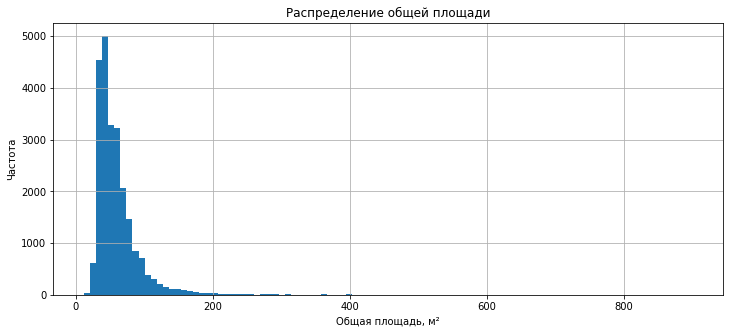

In [22]:
data['total_area'].plot(kind='hist', bins=100, figsize=(12,5), grid=True)
plt.title('Распределение общей площади')
plt.xlabel('Общая площадь, м²')
plt.ylabel('Частота')
plt.show()

На гистограмме видно, что объекты с общей площадью более 200 м² встречаются довольно редко - исключим их из датафрейма.

In [23]:
data = data.query('total_area <= 200')

#### Жилая площадь

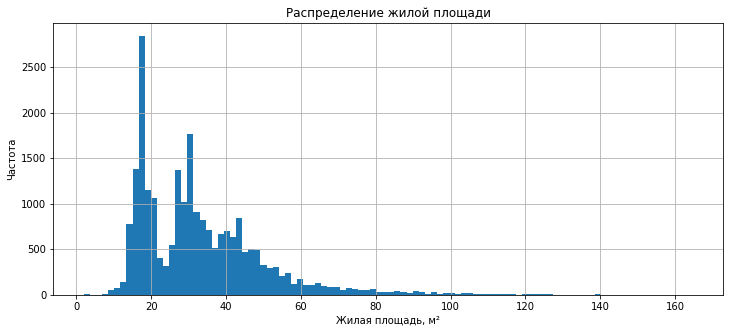

In [24]:
data['living_area'].plot(kind='hist', bins=100, figsize=(12,5), grid=True)
plt.title('Распределение жилой площади')
plt.xlabel('Жилая площадь, м²')
plt.ylabel('Частота')
plt.show()

Исходя из гистограммы можно сделать вывод о том, что объекты редко имеют жилую площадь более 130 м² - икслючим их из датафрейма.

In [25]:
data = data.query('living_area <= 130')

#### Площадь кухни

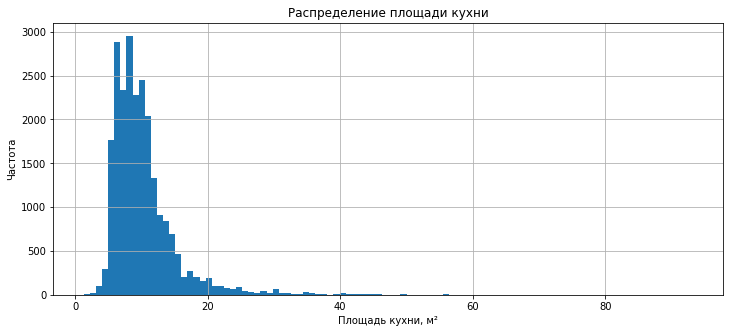

In [26]:
data['kitchen_area'].plot(kind='hist', bins=100, figsize=(12,5), grid=True)
plt.title('Распределение площади кухни')
plt.xlabel('Площадь кухни, м²')
plt.ylabel('Частота')
plt.show()

Гистограмма указывает на то, что площадь кухни зачастую не превышает 40 м² - исключим аномалии из датафрейма.

In [27]:
data = data.query('kitchen_area <= 40')

#### Цена

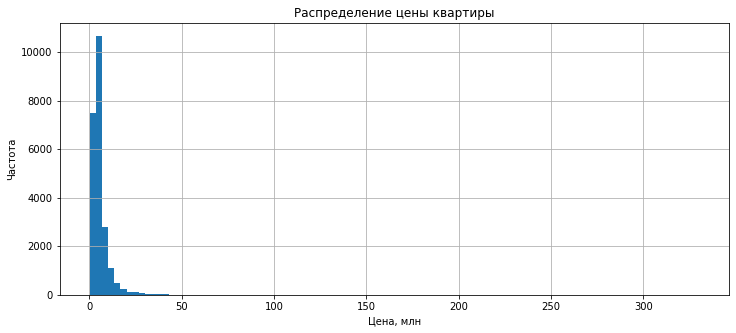

In [28]:
last_price_mln = data['last_price']/1000000 #переведем цену в млн, чтобы сделать гистограмму более наглядной

last_price_mln.plot(kind='hist', bins=100, figsize=(12,5), grid=True)
plt.title('Распределение цены квартиры')
plt.xlabel('Цена, млн')
plt.ylabel('Частота')
plt.show()

Из гистограммы видно, что цена объекта редко превышает 50 млн - исключим аномалии из датафрейма.

In [29]:
data = data.query('last_price <= 50000000')

#### Количество комнат

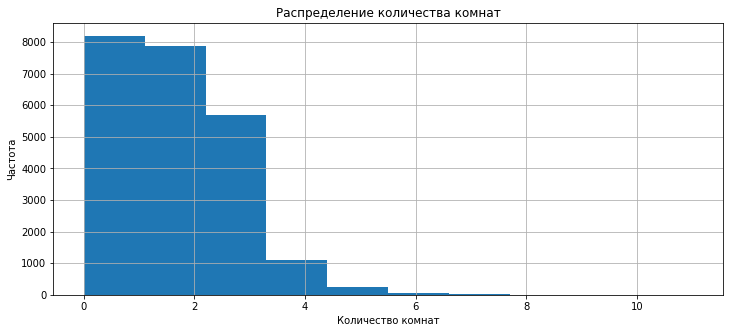

In [30]:
data['rooms'].plot(kind='hist', figsize=(12,5), grid=True)
plt.title('Распределение количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Частота')
plt.show()

На гистограмме видно, что объекты с более, чем 6-ю комнатами, встречаются довольно редко - исключим их из датафрейма.

In [31]:
data = data.query('rooms <= 6')

#### Высота потолков

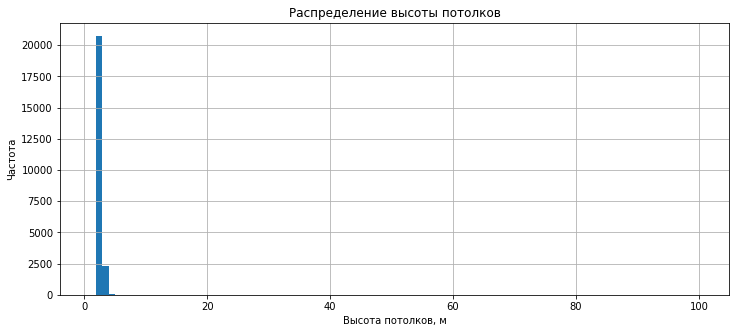

In [32]:
data['ceiling_height'].plot(kind='hist', bins=100, figsize=(12,5), grid=True)
plt.title('Распределение высоты потолков')
plt.xlabel('Высота потолков, м')
plt.ylabel('Частота')
plt.show()

Из гистограммы можно сделать вывод о том, что высота потолков зачастую не превышает 5 метров - исключим аномалии из датафрейма.

In [33]:
data = data.query('ceiling_height <= 5')

#### Тип этажа

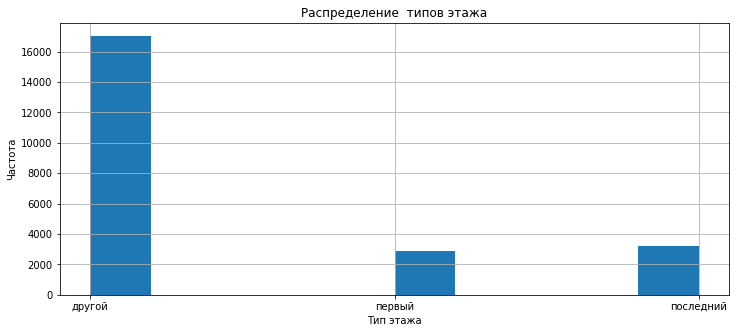

In [34]:
data['floor_type'].hist(figsize=(12,5))
plt.title('Распределение  типов этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Частота')
plt.show()

На данной гистограмме видно, что квартир на первом и последнем этажах меньше, чем на других этажах, что закономерно.

#### Общее количество этажей в доме

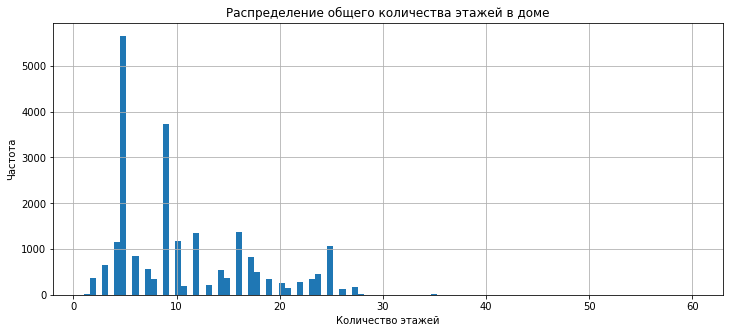

In [35]:
data['floors_total'].plot(kind='hist', bins=100, figsize=(12,5), grid=True)
plt.title('Распределение общего количества этажей в доме')
plt.xlabel('Количество этажей')
plt.ylabel('Частота')
plt.show()

Гистограмма указывает на то, что дома с количеством этажей более 30 встречаются досаточно редко - исключим их из датафрейма.

Также можно заменить, что большая часть домов - это пятиэтажки и девятиэтажки.

In [36]:
data = data.query('floors_total <= 30')

#### Расстояние до центра города

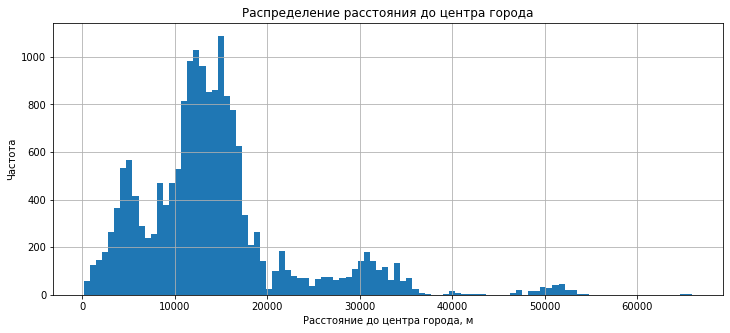

In [37]:
data['cityCenters_nearest'].plot(kind='hist', bins=100, figsize=(12,5), grid=True)
plt.title('Распределение расстояния до центра города')
plt.xlabel('Расстояние до центра города, м')
plt.ylabel('Частота')
plt.show()

На гистограмме видны довольно разрозненные значения расстояния до центра города, что логично, так как в датафрейме есть данные из разных населенных пунктов.

#### Расстояние до ближайшего парка

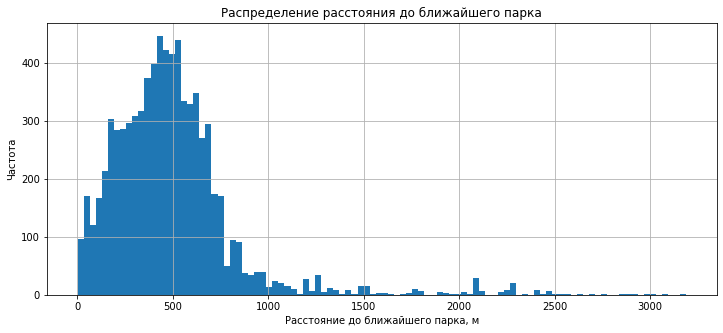

In [38]:
data['parks_nearest'].plot(kind='hist', bins=100, figsize=(12,5), grid=True)
plt.title('Распределение расстояния до ближайшего парка')
plt.xlabel('Расстояние до ближайшего парка, м')
plt.ylabel('Частота')
plt.show()

Аналогично с расстоянием до ближайшего парка, редкие значения расстояния до ближайшего парка являются закономерностью, а не аномалией, так как мы изучаем данные из разных населенных пунктов.

### Исследование количества дней для продажи квартиры

Изучим, как быстро продавались квартиры.

Начнем с визуализации данных с помощью гистограммы.

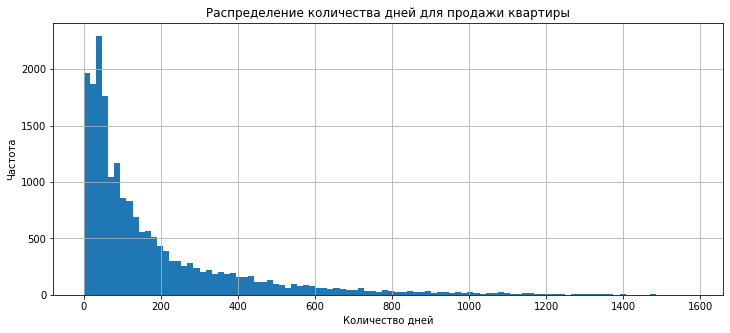

In [39]:
data['days_exposition'].plot(kind='hist', bins=100, figsize=(12,5), grid=True)
plt.title('Распределение количества дней для продажи квартиры')
plt.xlabel('Количество дней')
plt.ylabel('Частота')
plt.show()

Рассмотрим поближе наиболее часто встречающиеся данные.

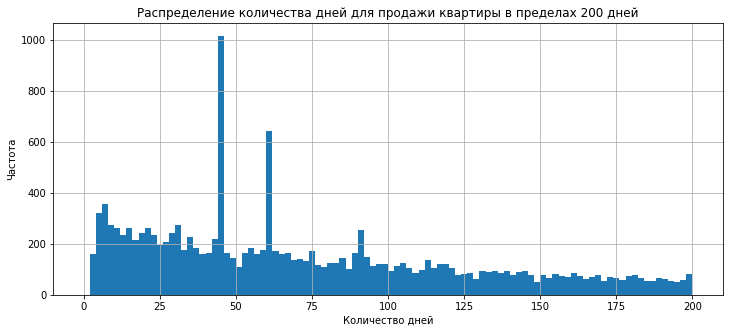

In [40]:
data['days_exposition'].plot(kind='hist', range=(0,200), bins=100, figsize=(12,5), grid=True)
plt.title('Распределение количества дней для продажи квартиры в пределах 200 дней')
plt.xlabel('Количество дней')
plt.ylabel('Частота')
plt.show()

Посчитаем среднее и медиану.

In [41]:
data['days_exposition'].describe()

count    20049.000000
mean       178.947928
std        217.660728
min          1.000000
25%         45.000000
50%         94.000000
75%        228.000000
max       1580.000000
Name: days_exposition, dtype: float64

В среднем продажа квартиры занимает от трех до шести месяцев. Чаще всего квартиры снимают с публикации через 45 и 60 дней - это может быть связано с тем, что продавцы опубликовывают обявления о квартирах заново через полтора-два месяца, чтобы привлечь внимание покупателей, или с тем, что объявления снимаются с публикации автоматически при отсутствии оплаты.

Быстрыми можно считать продажи, совершенные менее, чем за полтора месяца. Их около 25% от общего количества продаж.

Необычно долгими можно считать продажи, на которые ушло более года.

### Исследование факторов, влияющих на общую стоимость квартиры

#### Общая площадь

In [42]:
data['last_price'].corr(data['total_area'])

0.7593169161916318

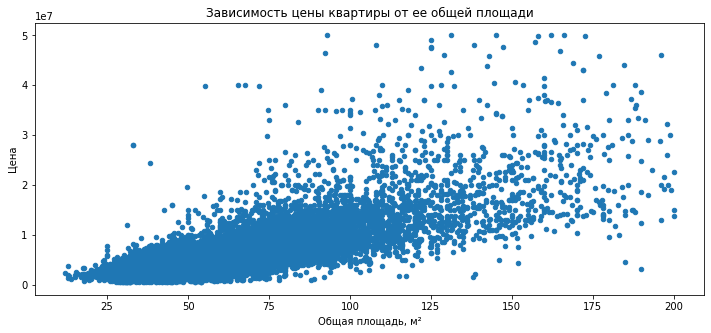

In [43]:
data.plot(x='total_area', y='last_price', kind='scatter', figsize=(12,5))
plt.title('Зависимость цены квартиры от ее общей площади')
plt.xlabel('Общая площадь, м²')
plt.ylabel('Цена')
plt.show()

Коэффициент корреляции между ценой и общей площадью квартиры высокий - 0.76.

График также указывает на прямую взаимосвязь между этими параметрами.

#### Жилая площадь

In [44]:
data['last_price'].corr(data['living_area'])

0.661587376310914

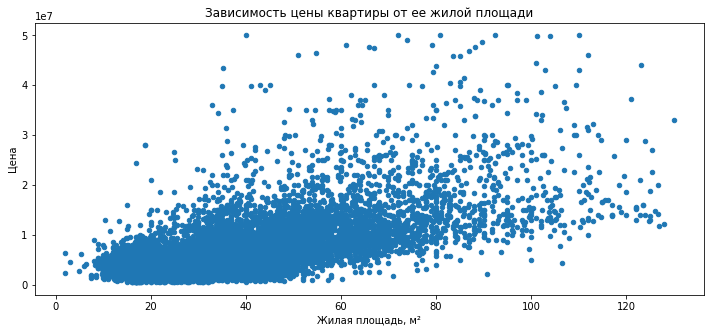

In [45]:
data.plot(x='living_area', y='last_price', kind='scatter', figsize=(12,5))
plt.title('Зависимость цены квартиры от ее жилой площади')
plt.xlabel('Жилая площадь, м²')
plt.ylabel('Цена')
plt.show()

Между ценой и жилой площадью коэффициент также высокий - 0.66.

На графике прослеживается взаимосвязь между этими параметрами, хотя и менее очевидно.

#### Площадь кухни

In [46]:
data['last_price'].corr(data['kitchen_area'])

0.5887367888036021

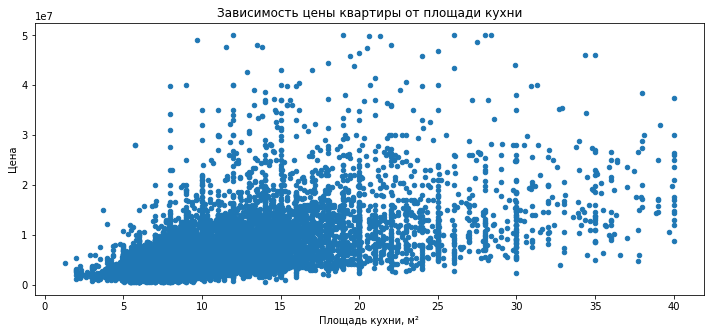

In [47]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', figsize=(12,5))
plt.title('Зависимость цены квартиры от площади кухни')
plt.xlabel('Площадь кухни, м²')
plt.ylabel('Цена')
plt.show()

Коэффициент корреляции между ценой и площадью кухни тоже высокий - 0.59.

На графике хоть связь и прослеживается связь между этими параметрами, но чем больше площадь кухни, тем связь становится более слабой. 

#### Количество комнат

In [48]:
data['last_price'].corr(data['rooms'])

0.46401655151586263

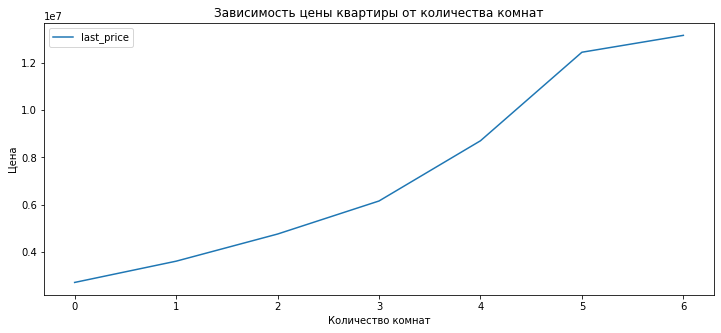

In [49]:
data.pivot_table(index='rooms', values='last_price', aggfunc='median').plot(figsize = (12, 5))
plt.title('Зависимость цены квартиры от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена')
plt.show()

Между ценой и количеством комнат коэффициент корреляции ниже, но все еще указывает на связь, - 0.47.

График также указывает на прямую связь между этими параметрами.

#### Тип этажа

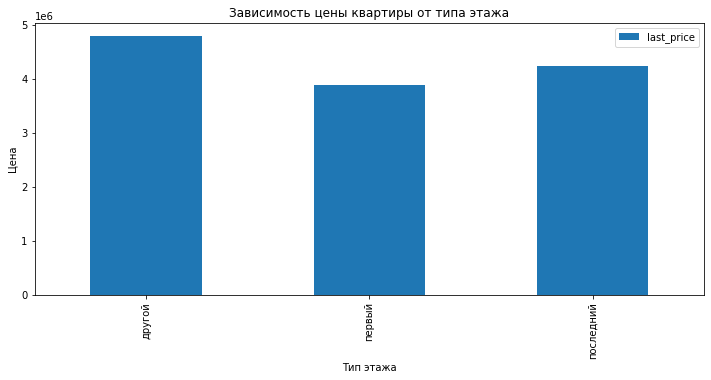

In [50]:
data.pivot_table(index='floor_type', values='last_price', aggfunc='median').plot(kind='bar', figsize = (12, 5))
plt.title('Зависимость цены квартиры от типа этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Цена')
plt.show()

На графике видно, что квартиры на первом и последних этажех в среднем стоят немного меньше, чем на прочих этажах.

#### Дата размещения

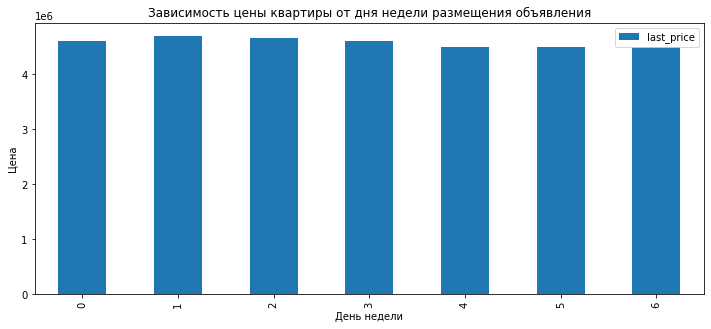

In [51]:
data.pivot_table(index='day_of_week_of_exposition', values='last_price', aggfunc='median').plot(kind='bar', figsize = (12, 5))
plt.title('Зависимость цены квартиры от дня недели размещения объявления')
plt.xlabel('День недели')
plt.ylabel('Цена')
plt.show()

На графике видно, что день недели размещения практически не влияет на цену квартиры.

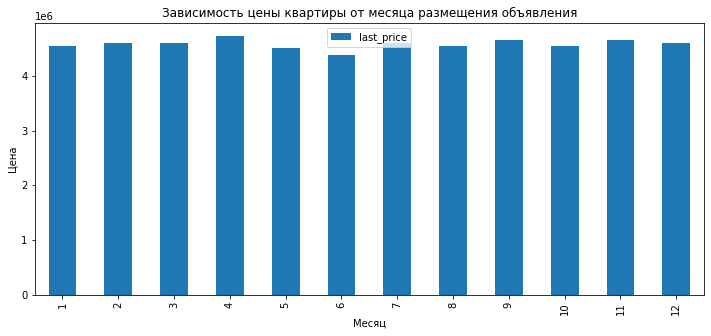

In [52]:
data.pivot_table(index='month_of_exposition', values='last_price', aggfunc='median').plot(kind='bar', figsize = (12, 5))
plt.title('Зависимость цены квартиры от месяца размещения объявления')
plt.xlabel('Месяц')
plt.ylabel('Цена')
plt.show()

Из графика можно сделать вывод о том, что месяц размещения несильно влияет на цену квартиры.

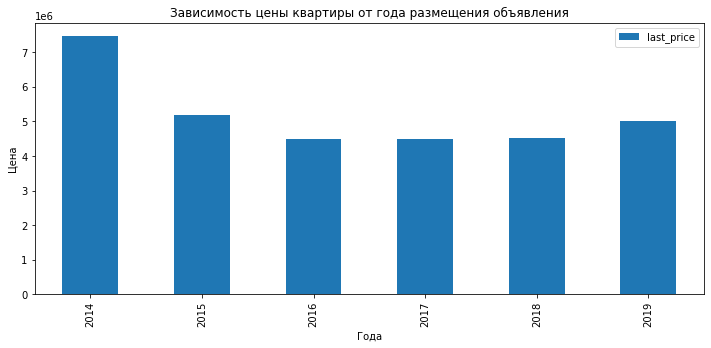

In [53]:
data.pivot_table(index='year_of_exposition', values='last_price', aggfunc='median').plot(kind='bar', figsize = (12, 5))
plt.title('Зависимость цены квартиры от года размещения объявления')
plt.xlabel('Года')
plt.ylabel('Цена')
plt.show()

График указывает на то, что в 2014 году квартиры стояли почти в два раза больше, чем в последующих годах, но тенденции к снижению цен на квартиры со временем нет.

### Исследование стоимости квадратного метра

Изучим среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [54]:
locality_name_top_10 = data['locality_name'].value_counts().head(10)

In [55]:
locality_top_10_pivot = data.query('locality_name in @locality_name_top_10.index')\
.pivot_table(index='locality_name', values='price_per_m2', aggfunc=['count', 'mean'])
locality_top_10_pivot.columns = ['Количество объявлений', 'Средняя цена за м²']
locality_top_10_pivot.sort_values(by='Количество объявлений', ascending=False)

,Количество объявлений,Средняя цена за м²
locality_name,,
Санкт-Петербург,15224,111904.325042
поселок Мурино,549,85602.500492
поселок Шушары,438,78577.015091
Всеволожск,398,68654.473970
Пушкин,360,102901.982806
Колпино,337,75333.295816
поселок Парголово,326,90332.262638
Гатчина,306,68757.678399
деревня Кудрово,299,92473.547559


Из 10 населенных пунктов с самым большим количеством объявлений самая высокая стоимость квадратного метра в Санкт-Петербурге (более 111 тысяч), а самая низкая - в Выборге (около 58 тысяч).

### Исследование изменения стоимости квадратного метра по степени удалённости от центра

Изучим соимость квадратного километра в Санкт-Петербурге для каждого километра по степени удаленности от центра.

In [56]:
spb_cityCenter_price = data.query('locality_name == "Санкт-Петербург"')\
.pivot_table(index='cityCenters_nearest_km', values='price_per_m2', aggfunc='mean')
spb_cityCenter_price

,price_per_m2
cityCenters_nearest_km,
0.0,192470.119000
1.0,146709.316951
2.0,138290.269412
3.0,118867.401550
4.0,127662.808767
5.0,135047.150428
6.0,140585.668674
7.0,140943.624016
8.0,123484.865955


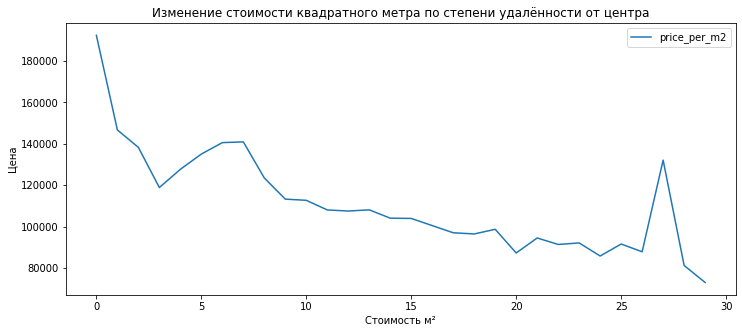

In [57]:
spb_cityCenter_price.plot(figsize = (12, 5))
plt.title('Изменение стоимости квадратного метра по степени удалённости от центра')
plt.xlabel('Стоимость м²')
plt.ylabel('Цена')
plt.show()

На графике видно, что по мере удаления объекта недвижимости от центра, цена за квадратный метр как правило уменьшается.

Однако, есть выброс - неожиданно высокая средняя цена для объектов на расстоянии в 27 км. Изучим эти объекты подробнее.

In [58]:
data.query('cityCenters_nearest_km == 27.0 and locality_name == "Санкт-Петербург"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,day_of_week_of_exposition,month_of_exposition,year_of_exposition,floor_type,cityCenters_nearest_km
748,13,14350000.0,74.0,2017-11-28,2,3.13,5.0,30.0,3,False,...,1496.0,0,NaN,128.0,193918.92,1,11,2017,другой,27.0
5961,6,2250000.0,32.0,2018-02-27,1,2.65,2.0,16.5,2,False,...,NaN,0,NaN,178.0,70312.50,1,2,2018,последний,27.0


Данным критериям соответвует только два объекта недвижимости, поэтому мы можем сделать вывод о том, что этот случай представляет собой выброс и не должен влиять на общую статистику.

## Общий вывод

Для проведения исследования был использован датасет из более чем 23 тысяч строк, что является достаточно большой базой для формирования выводов об объявлениях о продаже квартир.

В ходе предобработки данных пропуски были заменены на средние или более подходящие по смыслу значения. Также были изменены типы данных, где они не соответствовали содержимому, исправлены дубликаты в названиях населенных пунктов и были добавлены столбцы с дополнительной информацией.

В процессе исследовательского анализа данных были удалены строки с аномальными значениями. Также было вывлено, что в среднем на продажу квартиры уходит от трех до шести месяцев.

Среди факторов, наиболее влияющих на цену квартиру были выделены:
* общая площадь - чем больше площадь, тем дороже квартира
* жилая площадь - чем больше площадь, тем дороже квартира
* площадь кухни - чем больше площадь, тем дороже квартира
* количество комнат - чем больше комнат, тем дороже квартира
* этаж, на котором расположена квартира - квартиры на первом этаже стоят дешевле
* год размещения - в 2017 году квартиры в среднем были дороже, чем в последующих годах

Цена также различается в зависимости от населенного пункта, например в Санкт-Петербурге находятся самые дорогие квартиры - в среднем, 111 тысяч за квадратный метр.

Также на цену влияет удаленность от центра города - чем ближе квартира к центру, тем она дороже.